In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

### Задание 1
Загрузите датасет из файла heart.csv со следующими полями (выборка об уровне сердечных заболеваний:
<ul>
<li>age : Возраст
<li>sex : Пол (1 = мужской; 0 = женский)
<li>cp : боль в груди (0 - типичная, 1 - асимптотическая, 2 - неангинальная, 3 - нетипичная).
<li>trestbps : кровяное давление в состоянии покоя.
<li>chol : холестерин сыворотки в мг/дл.
<li>fbs : уровень сахара в крови натощак > 120 мг/дл (1 = верно; 0 = неверно)
<li>restecg : результаты электрокардиографии в состоянии покоя
<li>thalach : максимальная частота сердечных сокращений
<li>exang : стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
<li>oldpeak : депрессия ST, вызванная нагрузкой по сравнению с отдыхом.
<li>slope : Наклон пикового сегмента ST при нагрузке.
<li>ca : количество крупных сосудов, окрашенных флюороскопически (0–3).
<li>thal : (3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект)
<li>target : АГД - Диагностика заболеваний сердца (1 = да; 0 = нет)
</ul>
<ol>
<li>Выведите полученный датасет на экран
<li>Пользуясь загруженным датасетом, подтвердите или опровергните гипотезу, что доля населения, страдающего сердечными заболеваниями в городе N, превышает 46% (выведите "да", если это так, и "нет" в противном случае). Также выведите на экран полученное значение p-value, округлив его до 6 знаков после запятой.
</ol>    

In [2]:
# Загрузка датасета
heart = pd.read_csv('heart.csv')

# Вывод датасета на экран
print(heart.head())

# Проверка гипотезы
p = 0.46  # Доля населения, страдающего сердечными заболеваниями в городе N
n = len(heart)  # Размер выборки
k = heart['target'].sum()  # Количество людей, страдающих сердечными заболеваниями в выборке

# Вычисление тестовой статистики и p-value
z_score, p_value = proportions_ztest(k, n, p)

# Вывод результата
if p_value < 0.05:
    print("да")
else:
    print("нет")
print(f"p-value: {p_value:.6f}")

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
да
p-value: 0.003122


### Задание 2
Есть предположение, что среднее давление мужчин и женщин в состоянии покоя в городе N не отличается. Но некоторыми учеными была выдвинута гипотеза, что женщины имеют среднее давление выше чем мужины. Примите или опровергните альтернативную гипотезу. Для этого предварительно убедитесь, что генеральные совокупности имеют равные дисперсии и что обе выборки имеют распределение, близкое к нормальному (с помощью гистограммы). Выведите значение p-value, округлив до 6 знаков после запятой.


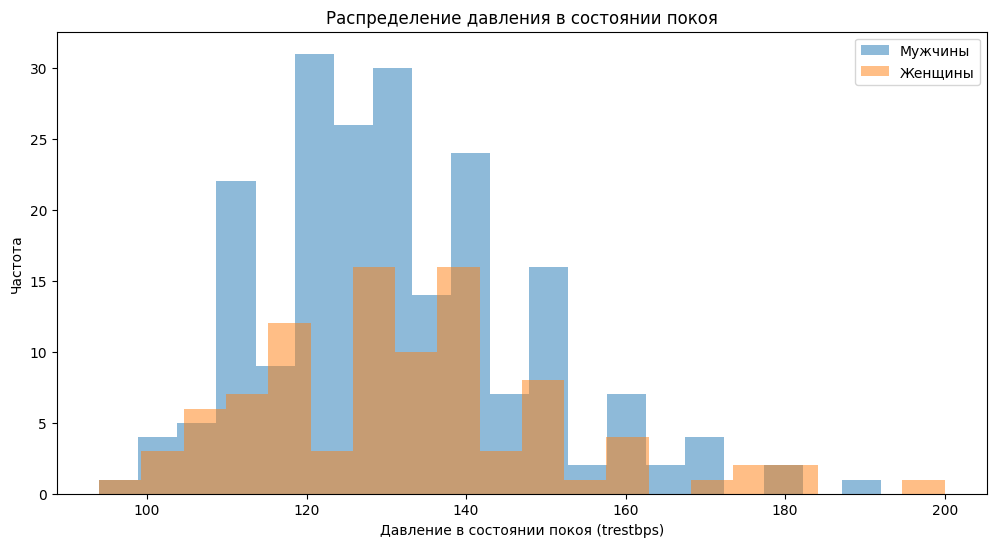

Levene's test p-value: 0.244580
Shapiro-Wilk test for males: p-value = 0.000107
Shapiro-Wilk test for females: p-value = 0.006315
t-test p-value: 0.162342


In [3]:
# Построение гистограмм для давления в состоянии покоя у мужчин и женщин
plt.figure(figsize=(12, 6))
plt.hist(heart[heart['sex'] == 1]['trestbps'], bins=20, alpha=0.5, label='Мужчины')
plt.hist(heart[heart['sex'] == 0]['trestbps'], bins=20, alpha=0.5, label='Женщины')
plt.title('Распределение давления в состоянии покоя')
plt.xlabel('Давление в состоянии покоя (trestbps)')
plt.ylabel('Частота')
plt.legend()
plt.show()
from scipy.stats import levene

male_pressure = heart[heart['sex'] == 1]['trestbps']
female_pressure = heart[heart['sex'] == 0]['trestbps']

# Проверка равенства дисперсий
levene_stat, levene_pvalue = levene(male_pressure, female_pressure)
print(f"Levene's test p-value: {levene_pvalue:.6f}")
from scipy.stats import shapiro

# Проверка нормальности
shapiro_male = shapiro(male_pressure)
shapiro_female = shapiro(female_pressure)

print(f"Shapiro-Wilk test for males: p-value = {shapiro_male.pvalue:.6f}")
print(f"Shapiro-Wilk test for females: p-value = {shapiro_female.pvalue:.6f}")
# t-тест для проверки гипотезы, что среднее давление женщин выше, чем у мужчин
t_stat, p_value = stats.ttest_ind(female_pressure, male_pressure, equal_var=True, alternative='greater')
print(f"t-test p-value: {p_value:.6f}")


### Задание 3
Считается, что средний уровень холестерина среди населения старше 60 лет, равен 250. Была выдвинута гипотеза, что это не так (что она не равна 250). Примите или опровергните эту гипотезу.Выведите значени p-value.

In [4]:
# Проверка гипотезы
result = stats.ttest_1samp(heart[heart['age'] > 60]['chol'], 250)

# Вывод результата
print("p-value:", result.pvalue)

p-value: 0.15876173897401408


### Задание 4
Вычислите доверительный интервал с уровнем точности 95% для среднего значения максимальной частоты сердечных сокращений населения в городе N.

In [5]:
from scipy.stats import norm

# Вычисляем среднее значение и стандартное отклонение для максимальной частоты сердечных сокращений
thalach_mean = heart['thalach'].mean()
thalach_std = heart['thalach'].std(ddof=1)

# Размер выборки
n = len(heart['thalach'])

# Уровень значимости (1 - 0.95)
alpha = 0.05

# Вычисляем доверительный интервал
conf_interval = norm.interval(1 - alpha, loc=thalach_mean, scale=thalach_std / np.sqrt(n))

print(f"95% доверительный интервал для среднего значения максимальной частоты сердечных сокращений: {conf_interval}")


95% доверительный интервал для среднего значения максимальной частоты сердечных сокращений: (np.float64(147.0678125139342), np.float64(152.22591685900312))
